## Multiclass Classification

According to Wikipedia:
> In machine learning, **multiclass** or **multinomial classification** is the problem of classifying instances into one of the more than two classes (classifying instances into one of the two classes is called binary classification).

For instance, you are given an Apple product and you are told to classify it into one of the following:

1. Apple Watch
2. Apple TV
3. iMac
4. iPad
5. iPhone
6. iPod
7. MacBook

So, this is a type of multiclass classification problem. 

In this post, let's learn how to approach a multiclass classification problem. We will be using a dataset that has 5 categories to which we should classify the given data. 

Let's import all the necessary libraries. 

In [183]:
# imports

# numpy, lambda, matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cross_validation import ShuffleSplit
from sklearn.learning_curve import learning_curve
from sklearn.manifold.t_sne import TSNE

# I will be explaining the purpose of each library as we approach the problem.

Let's read the input data

In [154]:
# train and test data
# here we will be using pandas library to read the input data in the form of CSV

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [155]:
# let's see what's inside the training data
# pandas is a good library to play with data, also you can clean the data.

train.head(3)

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249,label
0,0,25.208249,-16.745748,50.869944,5.593472,1.188263,-6.014167,15.922007,-42.026918,-0.064017,...,6.731995,4.805149,-9.682240,-8.771275,159.124491,3.682115,-4.938090,130.068955,-8.231081,1
1,1,-86.931450,0.428227,2.874836,-8.064850,6.056867,6.124567,2.527879,-9.277728,-7.586313,...,-6.274857,-9.967576,-70.256324,-5.278519,-53.004625,6.484784,-6.389429,-26.164277,-4.909740,2
2,2,42.160934,7.857013,151.612757,9.639676,5.570139,-3.261364,10.814200,-37.394430,-5.791044,...,9.362207,18.524639,39.445002,-1.980687,-7.543595,-1.971843,8.034066,120.510705,7.754377,0


In [24]:
# let's check the shape of the dataset

train.shape

(7200, 252)

Looks like the training dataset contains 7200 rows and 252 columns.

Also, there are 250 _features_, an _id_ column and a _label_ column.

In [25]:
# let's check the information about the training and test dataset

train.info()
print("-")*40
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Columns: 252 entries, id to label
dtypes: float64(250), int64(2)
memory usage: 13.8 MB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4800 entries, 0 to 4799
Columns: 251 entries, id to feature249
dtypes: float64(250), int64(1)
memory usage: 9.2 MB


Now, let's clean the training dataset for any null values

In [26]:
# checking for null values

train.isnull().sum().sum()

0L

Looks like there are no null values in the dataset

Now, let's do feature selection, where we use the features which we think are important for classification later on on new data.

In [156]:
# feature selection

# seperate labels from training set
labels = train['label']

# drop or remove id and label columns from training set
train.drop(['id', 'label'], axis=1, inplace=True)

Let's see how the training set looks after some trimming.

In [28]:
# training set after removing id and label column

train.head(3)

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,25.208249,-16.745748,50.869944,5.593472,1.188263,-6.014167,15.922007,-42.026918,-0.064017,-6.492815,...,-10.528125,6.731995,4.805149,-9.682240,-8.771275,159.124491,3.682115,-4.938090,130.068955,-8.231081
1,-86.931450,0.428227,2.874836,-8.064850,6.056867,6.124567,2.527879,-9.277728,-7.586313,-1.802893,...,-5.154289,-6.274857,-9.967576,-70.256324,-5.278519,-53.004625,6.484784,-6.389429,-26.164277,-4.909740
2,42.160934,7.857013,151.612757,9.639676,5.570139,-3.261364,10.814200,-37.394430,-5.791044,0.073638,...,5.789345,9.362207,18.524639,39.445002,-1.980687,-7.543595,-1.971843,8.034066,120.510705,7.754377


Let's do the same for test data, remove id column

In [30]:
# what test dataset looks like

test.head(3)

,id,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature240,feature241,feature242,feature243,feature244,feature245,feature246,feature247,feature248,feature249
0,7200,-76.795547,-12.319618,-109.961631,-11.006934,-8.770868,-1.246577,3.875265,33.877412,7.757658,...,5.515601,10.530372,6.887168,-76.231907,3.374217,-128.668656,6.001156,2.619267,-14.869630,-4.718944
1,7201,15.860563,-5.344301,74.481876,1.267520,7.044210,6.391507,-7.713534,-1.336639,1.197008,...,-4.515135,4.041697,-9.170853,-38.501120,0.036281,22.997648,-4.050474,-16.322332,-54.813692,14.470087
2,7202,21.243900,-7.539082,-13.128054,-7.283449,1.430600,8.113846,-7.219936,-83.107625,-7.449005,...,-1.748731,-2.171528,16.292004,30.960787,0.380944,-86.906365,14.387590,-3.615364,160.603909,-11.330304


In [31]:
# dropping id column and storing it for later use

test_ids = test['id']
test.drop(['id'], axis=1, inplace=True)

Now, we have segregated the data according to our need.

Let's do some visualizations on the labels.

In [36]:
# count of values under each category

label_count = labels.value_counts().sort_index(ascending=True)
print label_count

0    1419
1    1426
2    1485
3    1410
4    1460
Name: label, dtype: int64


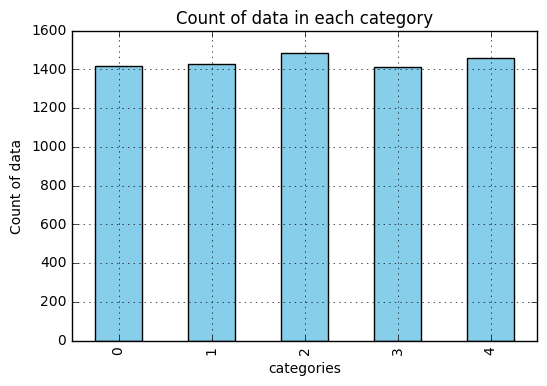

In [55]:
# visualizing the training labels

label_count.plot(kind='bar', color='skyblue')
plt.xlabel("categories")
plt.ylabel("Count of data")
plt.title("Count of data in each category")
plt.grid()


From the visualization, it's clear that data is spread evenly across all the 5 categories.

Next, let's split the training set into training set and validation set.

For splitting the dataset, we will be making use of train_test_split from sklearn.

Training Set = 80%
Validation Set = 20%

The reason we use **random_state** is that the splitting of the data must not be random, as it might ruin the consistency.

In [67]:
# splitting of the dataset

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.2, random_state=21)

In [78]:
# check out the shape of each of the above train and test datasets
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("-"*50)
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (5760, 250)
Shape of y_train: (5760L,)
--------------------------------------------------
Shape of X_test: (1440, 250)
Shape of y_test: (1440L,)


Looks like we have got 80% and 20% split

Next, let's visualize the range of values in training set

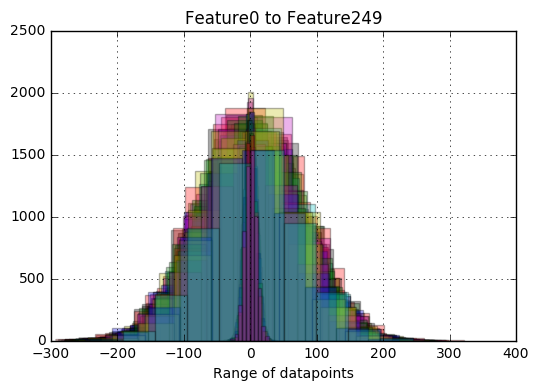

In [90]:
# visualizing the range of values in training set

for i in range(X_train.shape[1]):
    X_train["feature{}".format(i)].hist(alpha=0.3)
plt.xlabel("Range of datapoints")
plt.title("Feature0 to Feature249")
plt.show()

Looks like the datapoints range from **-300** to **300**. We shall bring this range to a single digit.

In-order to standardize the data, let's use the StandardScaler from sklearn.

StandardScaler brings down the range of values a single digit, where the new values are **0**. 
StandardScaler applies a normal distribution, with **mean = 0** and **standard deviation = 1**.

In [89]:
# standardize the data
std_scaler = StandardScaler().fit(X_train)

# transform train and test set using standardization
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

Let's visualize the range of datapoints in training set

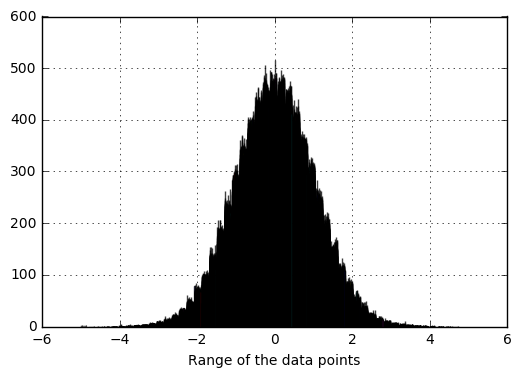

In [94]:
# range of values in training dataset after standardization

plt.hist(X_train_std, 50, alpha=0.75)
plt.xlabel('Range of the data points')
plt.grid(True)
plt.show()

Standardization worked!

The datapoints are now distributed between **-4** and **4**. 

Next, let's convert the **y_train** and **y_test** pandas series to numpy arrays.

In [100]:
# converting from pandas series to numpy array

y_train = np.asarray(y_train, dtype='float64')
y_test = np.asarray(y_test, dtype='float64')

So, all the major cleaning process is done, next we need to choose a classification algorithm to train it. 

But, before that we need to know what are the appropriate hyper paramters that our learning algorithm **KNeighborsClassifier** works efficiently.

In-order to choose the appropriate hyperparameters, let's using **GridSearchCV** from **model_selection**.

In [107]:
# an instane of KNNeighborsClassifier
estimator = KNeighborsClassifier()

# cross-validation using ShuffleSplit
# we do this so the GridSearchCV will train and test the dataset to find the appropriate hyperparameters
cv = ShuffleSplit(int(len(X_train_std)), n_iter=10, random_state=0, test_size=0.2)

# instance of GridSearchCV
classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=dict(n_neighbors=[5,6,7,8,9,10,11,12,13,14,15]))

# let's fit the classifier with the training set
classifier.fit(X_train_std, y_train)

GridSearchCV(cv=ShuffleSplit(5760, n_iter=10, test_size=0.2, random_state=0),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

That took a while to figure out the appropriate **n_neighbors** value 

Let's check the value of **n_neighbors**

In [108]:
print classifier.best_params_

{'n_neighbors': 15}


Looks like assigning **n_neighbors** to **15** is a good choice.

Let's train the KNeighborsClassifier with the best params value

In [112]:
# instance of KNeighborsClassifier

estimator = KNeighborsClassifier(n_neighbors=15)

In [113]:
# fit the training data

estimator.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=15, p=2,
           weights='uniform')

In [114]:
# testing on validation set

y_pred = estimator.predict(X_test_std)

Now, let's print **accuracy_score**, **confusion_matrix** and **classification_report** from **sklearn.metrics**

In [119]:
# printing out some metrics

print("Accuracy: {}".format(accuracy_score(y_test, y_pred)))
print("-"*50)
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))
print("-"*50)
print("Classification Report: \n{}".format(classification_report(y_test, y_pred)))

Accuracy: 0.970833333333
--------------------------------------------------
Confusion Matrix: 
[[274   2   0   1   0]
 [  2 250   3   1   3]
 [  1   3 280   3   0]
 [  4   6   3 294   3]
 [  3   3   1   0 300]]
--------------------------------------------------
Classification Report: 
             precision    recall  f1-score   support

        0.0       0.96      0.99      0.98       277
        1.0       0.95      0.97      0.96       259
        2.0       0.98      0.98      0.98       287
        3.0       0.98      0.95      0.97       310
        4.0       0.98      0.98      0.98       307

avg / total       0.97      0.97      0.97      1440



All the above scores are fine, let's have a look at the learning curve.

In [141]:
def leaning_curve_plot(estimator, X, y, cv):
    plt.figure()
    plt.title("Learning Curve")
    plt.xlabel("Traning Example")
    plt.ylabel("Score")
    plt.grid()
    
    # compute mean and standard deviation
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # fill_between 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    
    # plotting 
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Trainig score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross Validation score")

    plt.legend(loc="best")
    
    return plt

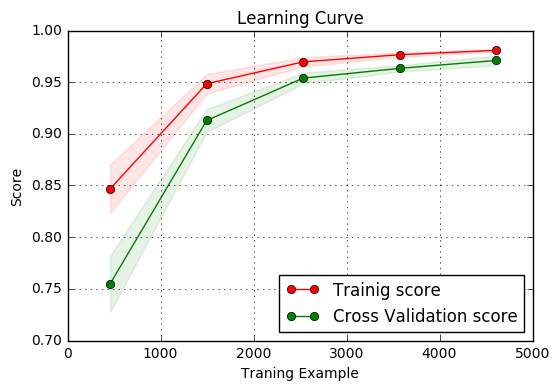

In [142]:
plt = leaning_curve_plot(estimator, X_train_std, y_train, cv)
plt.show()

Looks like the estimator's score goes high when the dataset size increases.

In [150]:
# Time to classify the test set
X_test = std_scaler.transform(test)

In [151]:
y_pred = estimator.predict(X_test)

In [152]:
# saving the output to a csv
output = pd.DataFrame({'id': test_ids, 'label': y_pred})

In [153]:
# printing output
output.head(4)

,id,label
0,7200,4.0
1,7201,2.0
2,7202,2.0
3,7203,4.0


Let's look at the decision boundary for the given dataset

(5760L, 2L)


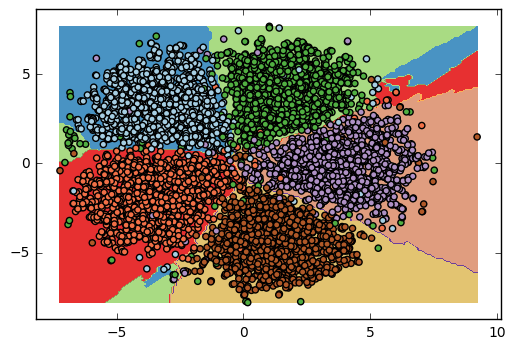

In [185]:
# reducing the dimensionality from 15 to 2
X_train_embedded = TSNE(n_components=2).fit_transform(X_train_std)
print X_train_embedded.shape
model = KNeighborsClassifier(n_neighbors=15).fit(X_train_std, y_train)
y_predicted = model.predict(X_train_std)

# create meshgrid
resolution = 150 # 150x150 background pixels
X2d_xmin, X2d_xmax = np.min(X_train_embedded[:,0]), np.max(X_train_embedded[:,0])
X2d_ymin, X2d_ymax = np.min(X_train_embedded[:,1]), np.max(X_train_embedded[:,1])
xx, yy = np.meshgrid(np.linspace(X2d_xmin, X2d_xmax, resolution), np.linspace(X2d_ymin, X2d_ymax, resolution))

# approximate Voronoi tesselation on resolution x resolution grid using 1-NN
background_model = KNeighborsClassifier(n_neighbors=15).fit(X_train_embedded, y_predicted) 
voronoiBackground = background_model.predict(np.c_[xx.ravel(), yy.ravel()])
voronoiBackground = voronoiBackground.reshape((resolution, resolution))

#plot
plt.contourf(xx, yy, voronoiBackground)
plt.scatter(X_train_embedded[:,0], X_train_embedded[:,1], c=y_train)
plt.show()

Here, we see a clear classification of the datapoints into different categories. 

Hope you have understood the process of solving a multiclass classification problem. 